# 0. 파일 정리, 사전 준비

### 필요한 패키지 임포트

In [1]:
import numpy as np                      # 수식, 수학 등 숫자 관련 연산에 필요한 numpy 패키지
import pandas as pd                     # 데이터를 다루기 위한 pandas 패키지
import matplotlib.pyplot as plt         # 그래프 등 그림을 그리기 위한 matplotlib 패키지
%matplotlib inline                       
import seaborn as sns                   # 그래프를 좀 더 이쁘게 그려줌. matplotlib랑 항상 같이 써야함
import datetime                         # 시간, 날짜, 달력 계산 패키지 datetime
import warnings
warnings.filterwarnings(action='ignore') # 코드 실행시 문제가 없지만 주의 문구가 나오는 것을 무시하도록 함

### 그래프를 그릴 때 한글 폰트가 깨지지 않게끔 출력하도록 함

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'     # 한글 폰트를 '맑은 고딕' 으로 지정
plt.rc('axes', unicode_minus = False)            # ' - ' 음수 표기에서 에러가 없도록 함

### 각각의 엑셀 파일을 읽어들여 변수로 저장

In [3]:
"""
dec = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/12월.xlsx')    # 파일이 저장된 경로는 당연하게 컴퓨터 마다 다름
jan = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/1월.xlsx')
feb = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/2월.xlsx')
mar = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/3월.xlsx')
apr = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/4월.xlsx')
may = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/5월.xlsx')
jun = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/6월.xlsx')
jul = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/7월.xlsx')
aug = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/8월.xlsx')
sep = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/9월.xlsx')
octb = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/10월.xlsx')
nov = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/11월.xlsx')
"""

"\ndec = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/12월.xlsx')    # 파일이 저장된 경로는 당연하게 컴퓨터 마다 다름\njan = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/1월.xlsx')\nfeb = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/2월.xlsx')\nmar = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/3월.xlsx')\napr = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/4월.xlsx')\nmay = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/5월.xlsx')\njun = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/6월.xlsx')\njul = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/7월.xlsx')\naug = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/8월.xlsx')\nsep = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/9월.xlsx')\noctb = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/10월.xlsx')\nnov = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/11월.xlsx')\n"

### 여러개의 엑셀 파일을 하나로 병합하고 병합한 엑셀 파일을 저장

In [4]:
"""
excel_names = ['12월.xlsx', '1월.xlsx', '2월.xlsx','3월.xlsx', '4월.xlsx', '5월.xlsx','6월.xlsx', '7월.xlsx', '8월.xlsx','9월.xlsx', '10월.xlsx', '11월.xlsx']  
excels = [pd.ExcelFile(name) for name in excel_names]  
frames = [x.parse(x.sheet_names[0], header=None,index_col=None) for x in excels]  
frames[1:] = [df[1:] for df in frames[1:]]  
data = pd.concat(frames)

data.to_excel("C:/Users/ST-USER/Desktop/1월 발제/data/data.xlsx", header=False, index=False)
"""

'\nexcel_names = [\'12월.xlsx\', \'1월.xlsx\', \'2월.xlsx\',\'3월.xlsx\', \'4월.xlsx\', \'5월.xlsx\',\'6월.xlsx\', \'7월.xlsx\', \'8월.xlsx\',\'9월.xlsx\', \'10월.xlsx\', \'11월.xlsx\']  \nexcels = [pd.ExcelFile(name) for name in excel_names]  \nframes = [x.parse(x.sheet_names[0], header=None,index_col=None) for x in excels]  \nframes[1:] = [df[1:] for df in frames[1:]]  \ndata = pd.concat(frames)\n\ndata.to_excel("C:/Users/ST-USER/Desktop/1월 발제/data/data.xlsx", header=False, index=False)\n'

### 엑셀 파일의 맨 윗줄을 변수명으로 지정함 

In [5]:
"""
data = data.rename(columns=data.iloc[0])
data = data.drop(data.index[[0]])
data
"""

'\ndata = data.rename(columns=data.iloc[0])\ndata = data.drop(data.index[[0]])\ndata\n'

# 1. 데이터의 기초 정보 확인

### 엑셀 파일을 경로에서 읽어들여 변수로 저장
**경로 지정시 폴더에서 복붙하면 \ (원 표시)로 구분되어 있을텐데 / 로 바꿔줘야 함**

In [6]:
df = pd.read_excel('C:/Users/ST-USER/Desktop/book/data/data.xlsx')  # 경로 지정시 폴더에서 복붙하면 \ 로 구분되어 있을텐데 / 로 바꿔줘야 함

In [7]:
df.info()  # 해당 엑셀 파일의 기본 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      2400 non-null   int64         
 1   도서명     2400 non-null   object        
 2   저자명     2400 non-null   object        
 3   출판사명    2400 non-null   object        
 4   출간일     2400 non-null   datetime64[ns]
 5   분야      2400 non-null   object        
 6   정가      2400 non-null   int64         
 7   쪽수      2400 non-null   int64         
 8   월       2400 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 168.9+ KB


**총 9개의 변수가 존재함을 확인할 수 있다.**


**매 월 200권씩 12개월이니 총 2400개의 정보가 존재한다.**

**df: 데이터프레임 dataframe 의 약자. 보통 관습적으로 첫 변수명은 이렇게 사용함**

In [8]:
df  # df: 데이터프레임 dataframe 의 약자. 보통 관습적으로 첫 변수명은 이렇게 사용함

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
0,1,트렌드 코리아 2020,김난도,미래의창,2019-10-24,경제/경영,18000,448,12
1,2,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,2019-10-30,인문,16000,392,12
2,3,지쳤거나 좋아하는 게 없거나,글배우,강한별,2019-09-04,시/에세이,13500,248,12
3,4,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,2019-03-10,인문,19800,474,12
4,5,에이트(양장본 HardCover),이지성,차이정원,2019-10-21,자기계발,17000,308,12
...,...,...,...,...,...,...,...,...,...
2395,196,해커스 토익 700+ LC+RC(한 권으로 끝내는),해커스 어학연구소,해커스어학연구소,2020-04-17,외국어,19500,596,11
2396,197,인간 실격(세계문학전집 103),다자이 오사무,민음사,2012-04-10,소설,8000,192,11
2397,198,주식 네 이놈. 2: 기법편,문제룡,지서연,2020-11-21,경제/경영,20000,292,11
2398,199,어린이 명심보감(읽으면서 바로 써먹는)(맛있는 공부 33),한날,파란정원,2020-09-15,어린이(초등),12000,224,11


**'월' 데이터가 숫자이므로 이것을 카테고리 자료형으로 변환**

In [9]:
df['월'] = df['월'].astype('category')  # '월' 데이터가 숫자이므로 이것을 카테고리 자료형으로 변환

**칼럼 넘버 8의 '월' 의 데이터타입이 int64 에서 category로 바뀐것을 확인 가능**

In [10]:
df.info()  # 칼럼 넘버 8의 '월' 의 데이터타입이 int64 에서 category로 바뀐것을 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      2400 non-null   int64         
 1   도서명     2400 non-null   object        
 2   저자명     2400 non-null   object        
 3   출판사명    2400 non-null   object        
 4   출간일     2400 non-null   datetime64[ns]
 5   분야      2400 non-null   object        
 6   정가      2400 non-null   int64         
 7   쪽수      2400 non-null   int64         
 8   월       2400 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 152.9+ KB


# 2. 탐색적 데이터 분석

## 1. 제일 비싼 도서와 제일 저렴한 도서를 확인

In [11]:
# 제일 비싼 도서와 제일 저렴한 도서
bk_cost=df.groupby('도서명')['정가'].mean() 
bk_cost.sort_values(ascending=False)

도서명
금융 위기 템플릿(레이 달리오의)(전3권)                 43000
이윤기의 그리스 로마 신화(특별합본판)(양장본 HardCover)    39800
유러피언                                    38000
자본과 이데올로기(양장본 HardCover)                38000
서양미술사                                   38000
                                        ...  
열혈강호. 81                                 4500
소설 보다: 가을 2020                           3500
소설 보다: 봄 2020                            3500
소설 보다: 여름 2020                           3500
부동산과 세금(2020)                            2000
Name: 정가, Length: 889, dtype: int64

**가장 비싼 베스트셀러는 43,000원 이고 가장 저렴한 베스트셀러는 2,000원 이다.**

## 2. 일년동안 항상 베스트셀러에 포함되어 있던 34권의 책 이름

In [12]:
count_n = df['도서명'].value_counts()  # 해당 칼럼의 서로 다른 값에 대한 개수를 세줌
count_n[:33]

멋진 신세계                                                      12
아몬드(양장본 HardCover)                                          12
지쳤거나 좋아하는 게 없거나                                             12
해커스 토익 스타트 리딩(Reading) RC(개정판 4판)                           12
꽃을 보듯 너를 본다(J.H CLASSIC 2)(양장본 HardCover)                   12
선량한 차별주의자                                                   12
방구석 미술관                                                     12
돌이킬 수 없는 약속                                                 12
총 균 쇠                                                       12
설민석의 조선왕조실록                                                 12
지적 대화를 위한 넓고 얕은 지식: 제로 편                                    12
당신이 옳다(40만 부 기념 '한 사람' 리커버)                                 12
부자 아빠 가난한 아빠. 1(20주년 특별 기념판)(개정증보판)                         12
해커스 토익 RC 리딩(Reading)(개정판 8판)                               12
팩트풀니스(양장본 HardCover)                                        12
하버드 상위 1퍼센트의 비밀                                        

**1개월도 빠지지 않고 베스트셀러 목록에 이름을 올렸던 책이 34권이나 존재한다.**

**상당히 유명한 책들이 이에 해당한다.**

**아래 셀에 나오지만 중복을 제거한 베스트셀러는 총 890권 이다.**

## 중복을 제거한 데이터프레임을 df1 라는 변수로 저장

In [13]:
df1 = df.drop_duplicates(['도서명'], ignore_index = True, keep = "first")
df1

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
0,1,트렌드 코리아 2020,김난도,미래의창,2019-10-24,경제/경영,18000,448,12
1,2,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,2019-10-30,인문,16000,392,12
2,3,지쳤거나 좋아하는 게 없거나,글배우,강한별,2019-09-04,시/에세이,13500,248,12
3,4,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,2019-03-10,인문,19800,474,12
4,5,에이트(양장본 HardCover),이지성,차이정원,2019-10-21,자기계발,17000,308,12
...,...,...,...,...,...,...,...,...,...
884,184,권력은 사람의 뇌를 바꾼다,강준만,인물과사상사,2020-10-26,정치/사회,17000,360,11
885,189,시가 나에게 살라고 한다,나태주 (엮음),&(앤드),2020-11-10,시/에세이,14500,260,11
886,191,수상한 이웃집(잠뜰TV 오리지널 스토리북)(양장본 HardCover),잠뜰TV (원작),서울문화사,2020-10-29,어린이(초등),11000,1,11
887,198,주식 네 이놈. 2: 기법편,문제룡,지서연,2020-11-21,경제/경영,20000,292,11


**중복 제거가 필요한 이유:
 분석에 따라 중복을 허용해야 하는 경우가 있고, 중복을 제거해야 하는 경우가 있다.
 특정 책이 몇 번이나 베스트셀러에 올랐는지 정보가 필요하다 하면 중복을 허용해야 하고, 
 베스트셀러에 올라본 적이 있는 책의 개수 정보가 필요하다 하면 중복을 제거해야 한다.
 필요에 따라 사용하는 데이터프레임을 다르게 할 필요가 있다."**
 
 
 **중복을 제거한 후 데이터의 크기가 2400개 에서 889개로 감소하였다. 절반이 훨씬 넘는 책이 2개월 이상 베스트셀러 목록에 이름을 올렸다.**

## 3. 베스트셀러의 가격 분포를 확인

Text(0, 0.5, 'Relative Frequncy')

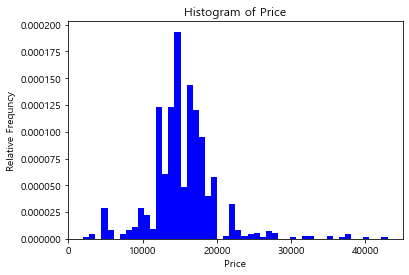

In [14]:
ax = plt.subplot()
ax.hist(df1['정가'], bins=50, density=True, color="blue")    # Y축이 상대빈도로, 색깔이 red로 변경함 
ax.set_title("Histogram of Price")
ax.set_xlabel("Price")
ax.set_ylabel("Relative Frequncy")

**베스트셀러의 가격대는 1만원부터 2만원 사이에 가장 많이 분포해있음을 확인할 수 있다.**

**5천원 정도와 3만원 이상의 베스트셀러도 어느정도 분포함을 확인할 수 있다.**

## 4. 베스트셀러를 가장 많이 낸 저자 상위 n명(40)

In [15]:
count_a = df1['저자명'].value_counts()
count_a[:40]

설민석                  14
David Cho            10
고토게 코요하루              9
흔한남매 (원작)             8
히가시노 게이고              8
김미영                   7
유대영                   7
정세랑                   6
백희나                   6
박시연                   6
히로시마 레이코              6
조용                    5
한날                    5
알베르 카뮈                5
채사장                   5
김현수                   4
Eiichiro Oda          4
글배우                   4
이도우                   4
박영숙                   3
김난도                   3
마이클 샌델                3
김리리                   3
해커스 어학연구소             3
오은영                   3
정재승 (기획)              3
전극진                   3
존 리                   3
신태훈                   3
트롤                    3
조지 오웰                 3
스토리 a.                3
홍춘욱                   3
Haruichi Furudate     3
데일 카네기                3
헤르만 헤세                3
김혜련                   3
법정                    3
네모아저씨 이원표             2
아현 (만화)               2
Name: 저자명, dtype: int64

**베스트셀러를 가장 많이 낸 저자는 설민석으로, 역사 관련 컨텐츠로 유명한 인강강사이다. 일년동안 무려 14권이나 베스트셀러에 올랐다.**

**그 다음으로는 David Cho가 유일하게 설민석과 같이 10권 이상의 베스트셀러를 내었는데, 해커스 영어로 유명한 저자이다**

### 설민석의 베스트셀러 목록

In [16]:
s = df1['저자명'] == '설민석'
s = df1[s]
s

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
6,7,설민석의 한국사 대모험. 12,설민석,아이휴먼,2019-12-05,어린이(초등),12000,212,12
33,34,설민석의 삼국지. 1,설민석,세계사,2019-07-17,인문,22000,440,12
35,36,설민석의 조선왕조실록,설민석,세계사,2016-07-20,역사/문화,22000,504,12
131,132,한국을 빛낸 100명의 위인들(설민석 쌤과 함께 부르는)(사운드북),설민석,아이휴먼,2017-12-01,유아(0~7세),16000,22,12
165,166,설민석의 세계사 대모험. 3,설민석,단꿈아이,2019-09-24,어린이(초등),12000,200,12
167,168,설민석의 무도 한국사 특강(개정판),설민석,휴먼큐브,2019-01-29,역사/문화,22000,433,12
207,60,설민석의 세계사 대모험. 4,설민석,단꿈아이,2020-01-13,어린이(초등),12000,208,1
336,9,설민석의 한국사 대모험. 13(반양장),설민석,아이휴먼,2020-03-23,어린이(초등),12000,200,3
412,48,설민석의 세계사 대모험. 5,설민석,단꿈아이,2020-04-15,어린이(초등),12000,208,4
497,86,설민석의 책 읽어드립니다,설민석,단꿈아이,2020-05-18,인문,15000,212,5


### David Cho의 베스트셀러 목록

In [17]:
d = df1['저자명'] == 'David Cho'
d = df1[d]
d

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
19,20,해커스 토익 기출 보카 TOEIC VOCA(개정판 5판),David Cho,해커스어학연구소,2020-03-05,외국어,12900,566,12
69,70,해커스 토익 RC 리딩(Reading)(개정판 8판),David Cho,해커스어학연구소,2020-03-02,외국어,18800,800,12
89,90,해커스 토익 LC 리스닝(Listening)(개정판 8판),David Cho,해커스어학연구소,2020-03-18,외국어,18800,626,12
141,142,해커스 보카(Hackers Vocabulary)(개정판 2판),David Cho,해커스어학연구소,2015-07-01,외국어,16900,366,12
192,193,해커스 토익 스타트 리딩(Reading) RC(개정판 4판),David Cho,해커스어학연구소,2020-02-20,외국어,14900,580,12
210,70,해커스 토익 스타트 리스닝(Listening) LC(개정판 4판),David Cho,해커스어학연구소,2020-03-09,외국어,14900,572,1
232,140,해커스 토익스피킹(토스) Start(2주 만에 끝내는)(개정판 4판),David Cho,해커스어학연구소,2020-01-06,외국어,19800,552,1
240,161,해커스 토플 리딩(Hackers TOEFL Reading),David Cho,해커스어학연구소,2019-08-01,외국어,23900,544,1
245,177,해커스 토익 중급 리딩(Hackers TOEIC Reading)(신토익 Editio...,David Cho,해커스어학연구소,2020-05-22,외국어,14900,504,1
251,186,해커스 뉴텝스(New TEPS) 기출 보카,David Cho,해커스어학연구소,2018-10-17,외국어,14900,568,1


## 5. 베스트셀러를 가장 많이 낸 출판사

In [18]:
count_a = df1['출판사명'].value_counts()
count_a[:40]

문학동네               28
아울북                21
아이세움               20
창비                 19
민음사                17
위즈덤하우스             17
비즈니스북스             15
해커스어학연구소           15
다산북스               14
대원씨아이              13
김영사                13
21세기북스             11
인플루엔셜              11
웅진지식하우스            11
한빛비즈               11
길벗                 11
알에이치코리아            11
쌤앤파커스              11
겜툰                 10
학산문화사               9
윌북                  9
리더스북                9
시공사                 8
흐름출판                8
한국경제신문              8
안드로메디안              8
토네이도                7
소미미디어               7
센시오                 7
어크로스                7
길벗스쿨                7
미디어숲                7
비룡소                 7
웨일북(whalebooks)     6
브론스테인               6
다산초당                6
더퀘스트                6
디앤씨웹툰비즈             6
페이지2북스              6
다연                  5
Name: 출판사명, dtype: int64

**베스트셀러를 가장 많이 낸 출판사는 문학동네와 아울북, 아이세움으로 20권 이상의 베스트셀러를 냈고, 그 밑으로는 창비, 민음사 등 문학 관련 출판사가 뒤를 이었다.**

**출판사의 베스트셀러 목록을 확인하여 해당 출판사가 주로 어느 분야의 책을 출판하고 있는지 확인이 가능하다.**

In [19]:
m = df1['출판사명'] == '문학동네'
m = df1[m]
m

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
9,10,여행의 이유,김영하,문학동네,2019-04-17,시/에세이,13500,216,12
49,50,긴 이별을 위한 짧은 편지(세계문학전집 68),페터 한트케,문학동네,2011-02-25,소설,10000,219,12
104,105,로마법 수업,한동일,문학동네,2019-09-25,인문,15500,268,12
128,129,개인주의자 선언,문유석,문학동네,2015-09-23,인문,13500,280,12
198,199,"걷는 사람, 하정우",하정우,문학동네,2018-11-23,시/에세이,15500,296,12
219,103,여자로 살아가는 우리들에게(양장본 HardCover),요조,문학동네,2019-10-30,시/에세이,15500,288,1
305,151,데미안(문학동네 세계문학전집 10주년 기념 리커버 특별판)(세계문학전집 101)(양...,헤르만 헤세,문학동네,2020-01-08,소설,9000,234,2
324,184,아직 멀었다는 말,권여선,문학동네,2020-02-14,소설,13500,284,2
350,72,페스트(세계문학전집 133),알베르 카뮈,문학동네,2015-12-26,소설,14000,384,3
353,81,제법 안온한 날들,남궁인,문학동네,2020-03-05,시/에세이,15000,328,3


In [20]:
a = df1['출판사명'] == '아울북'
a = df1[a]
a

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
26,27,Go Go 카카오프렌즈. 11: 한국(부록: 스티커 1장 + 스페셜 여권),김미영,아울북,2019-11-20,어린이(초등),12000,176,12
122,123,마법천자문. 46: 헷갈려라! 미혹할 미,김현수,아울북,2019-09-25,어린이(초등),12000,1,12
224,117,정재승의 인간탐구보고서. 2: 인간의 기억력은 형편없다(어린이를 위한 뇌과학 프로젝...,정재승 (기획),아울북,2019-12-30,어린이(초등),14000,164,1
238,158,그리스 로마 신화. 14: 인간들의 무모한 소원(만화로 읽는 초등 인문학)(양장본 ...,박시연,아울북,2019-12-18,어린이(초등),12000,196,1
266,27,마법천자문. 47: 잠드는 시간! 밤 야,김현수,아울북,2020-01-29,어린이(초등),12000,163,2
274,57,Go Go 카카오프렌즈. 12: 터키,김미영,아울북,2020-01-20,어린이(초등),12000,176,2
351,77,Go Go 카카오프렌즈. 13: 호주,김미영,아울북,2020-03-25,어린이(초등),12000,176,3
391,181,그리스 로마 신화. 15: 신에 도전한 인간들(만화로 읽는 초등 인문학)(양장본 H...,박시연,아울북,2020-02-19,어린이(초등),12000,220,3
447,154,"그리스 로마 신화. 16: 페르세우스, 영웅 신화의 시작(만화로 읽는 초등 인문학)...",박시연,아울북,2020-04-14,어린이(초등),12000,220,4
487,54,마법천자문. 48: 늘 생각하다! 생각 념,김현수,아울북,2020-05-20,어린이(초등),12000,164,5


In [21]:
i = df1['출판사명'] == '아이세움'
i = df1[i]
i

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
7,8,흔한남매. 1,흔한남매,아이세움,2019-06-20,어린이(초등),11000,164,12
53,54,추리 천재 엉덩이 탐정. 8: 괴도와 납치된 신부 사건(양장본 HardCover),트롤,아이세움,2019-07-25,어린이(초등),12000,88,12
92,93,내일은 실험왕. 48: 방사능 물질(본격 대결 과학실험 만화),스토리 a.,아이세움,2019-12-05,어린이(초등),12800,176,12
93,94,추리 천재 엉덩이 탐정과 카레사건(추리 천재 엉덩이 탐정 S 1),트롤,아이세움,2019-05-01,어린이(초등),12000,60,12
200,1,흔한남매. 3(양장본 HardCover),흔한남매 (원작),아이세움,2020-01-09,어린이(초등),12000,168,1
216,99,윔피 키드. 14: 수상한 리모델링 일기(양장본 HardCover),제프 키니,아이세움,2019-12-17,어린이(초등),12000,224,1
260,6,추리 천재 엉덩이 탐정. 9: 세 마리 행운 고양이 사건,트롤,아이세움,2020-01-15,어린이(초등),12000,88,2
320,179,흔한남매 안 흔한 일기. 1(양장본 HardCover),흔한남매 (원작),아이세움,2020-02-27,어린이(초등),12000,144,2
339,18,흔한남매. 4(양장본 HardCover),흔한남매 (원작),아이세움,2020-03-26,어린이(초등),12000,172,3
403,200,JUSTICE 정의란 무엇인가(10대를 위한),마이클 샌델,아이세움,2014-11-30,어린이(초등),12000,216,3


## 6. 분야별 베스트셀러 분포

In [22]:
count_a = df1['분야'].value_counts()
count_a

경제/경영        156
소설           117
시/에세이        113
어린이(초등)      100
자기계발          91
인문            85
만화            41
정치/사회         37
외국어           27
과학            24
역사/문화         21
가정/육아         16
건강            16
유아(0~7세)      14
예술/대중문화       12
요리             9
종교             4
컴퓨터/IT         3
기술/공학          1
여행             1
취미/실용/스포츠      1
Name: 분야, dtype: int64

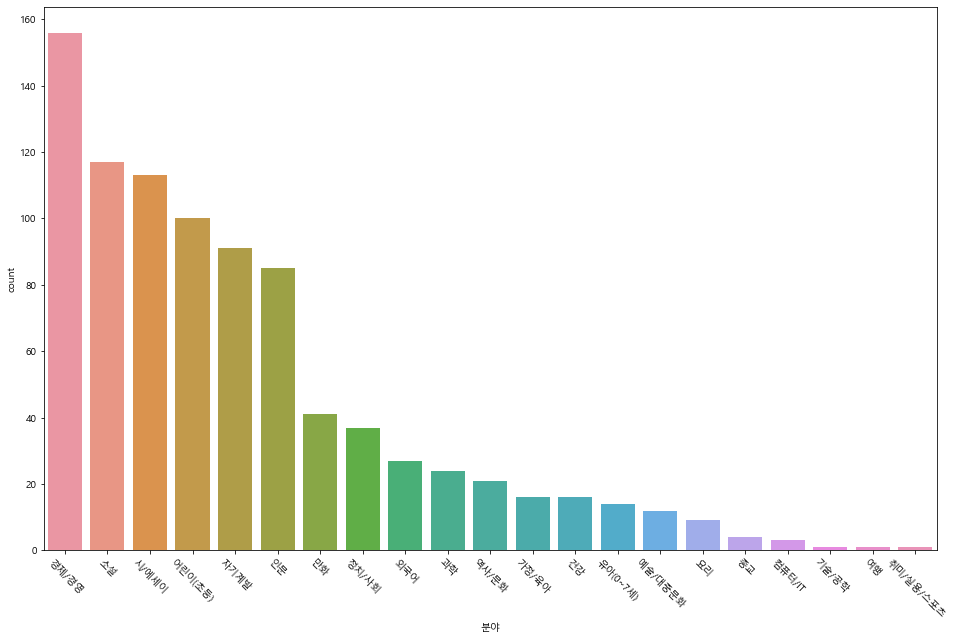

In [67]:
plt.figure(figsize = (16,10))
sns.countplot(df1['분야'], order = df1['분야'].value_counts().index)
plt.xticks(rotation = - 45 )
plt.show()

**분야별 베스트셀러를 확인해본 결과 경제/경영 분야의 베스트셀러가 수가 가장 많았고 그 다음이 소설, 시/에세이가 뒤를 이었다.**

**어린이 도서, 자기계발, 인문 분야의 도서가 80권 이상으로 그 다음이었다.**

**인문 분야의 바로 아래 분야인 만화는 40권 수준으로, 인문 분야와 두 배 가까운 차이를 보인다.**

**이를 통해 인기 있는 분야는 주로 6개 분야로 정해져 있고, 그 외 분야와 격차가 매우 큼을 알 수 있다.**

## 7. 베스트셀러 가격과 쪽수의 관계 확인

### 베스트셀러 가격 분포 확인

Text(0, 0.5, 'Relative Frequncy')

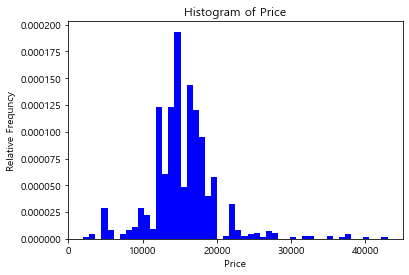

In [24]:
ax = plt.subplot()
ax.hist(df1['정가'], bins=50, density=True, color="blue")    # Y축이 상대빈도로, 색깔이 red로 변경함 
ax.set_title("Histogram of Price")
ax.set_xlabel("Price")
ax.set_ylabel("Relative Frequncy")

### 베스트셀러 쪽수 분포 확인

Text(0, 0.5, 'Relative Frequncy')

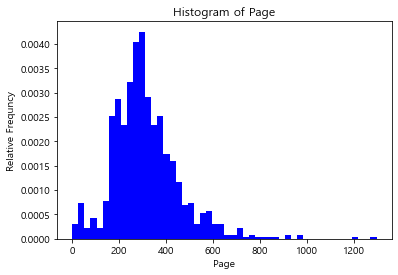

In [25]:
ax = plt.subplot()
ax.hist(df1['쪽수'], bins=50, density=True, color="blue")    # Y축이 상대빈도로, 색깔이 red로 변경함 
ax.set_title("Histogram of Page")
ax.set_xlabel("Page")
ax.set_ylabel("Relative Frequncy")

**히스토그램 상으로 보았을 때 비슷한 형태라고 볼 수 있다. 베스트셀러의 쪽수는 대부분이 200~400페이지 사이에 분포한다.**

**100쪽도 안되는 베스트셀러가 존재하는 반면, 1000쪽이 넘는 베스트셀러도 확인됨을 알 수 있다.**

### 정가와 쪽수 산점도

Text(0, 0.5, 'Page')

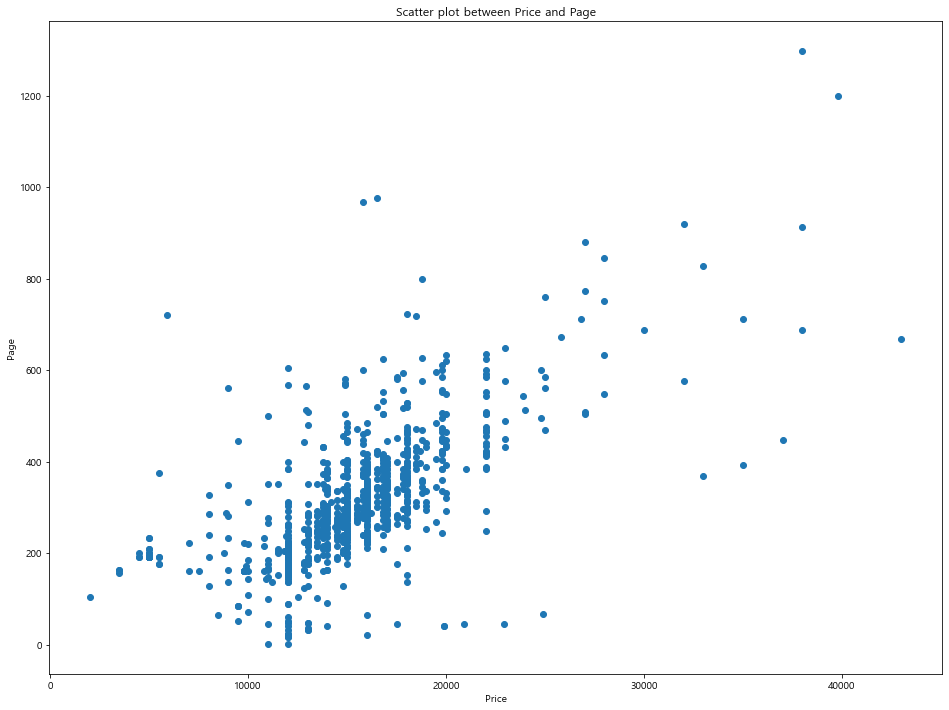

In [66]:
fig = plt.figure(figsize = (16,12)) 
ax = fig.add_subplot()
ax.scatter(df1['정가'], df1['쪽수'])
ax.set_title("Scatter plot between Price and Page")
ax.set_xlabel("Price")
ax.set_ylabel("Page")

**정가와 쪽수의 산점도를 보았을 때 양의 상관관계가 있음을 확인할 수 있다. 크게 눈에 띄는 이상치도 확인되지 않는다.**

In [27]:
cor = pd.DataFrame(df1[['정가', '쪽수']])  # 데이터프레임에서 정가와 쪽수만 따로 분리
cor

,정가,쪽수
0,18000,448
1,16000,392
2,13500,248
3,19800,474
4,17000,308
...,...,...
884,17000,360
885,14500,260
886,11000,1
887,20000,292


### 정가와 쪽수의 상관도 확인

In [28]:
cor.corr()

,정가,쪽수
정가,1.000000,0.660748
쪽수,0.660748,1.000000


**0.66의 상관도를 갖는다.**

# 3. 선형 회귀 분석

## 1. 정가와 쪽수가 선형 관계인지 확인해보기

In [29]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [30]:
fit = ols('정가 ~ 쪽수',data=df1).fit()

### 모델 확인

In [31]:
# 단순회귀분석

fit.summary()

# 결과해석 순서 : 결정계수 확인 -> 모형의 적합도 확인 -> 회귀계수 확인 -> t값과 t값의 유의확률
# r-squared 값이 0.437로 설명력이 43.7% 설명력이 조금 낮다.
# F값이 687.3, 유의확률은 0.000으로 통계적으로 유의미함.
# 결과 중 Intercept(절편)의 t값은 33.198, P>|t|값은 0.000으로 이 회귀모형의 절편값은 유의한 것으로 나타났으며 그 값은 9013.5419으로 나타났다.
# 쪽수의 t값은 26.217, P>|t|값은 0.000으로 쪽수도 유의하여 쪽수의 계수는 20.4583으로 도출됐다. 

# 즉, 1쪽이 증가할수록 정가가 20.4583원 증가한다는 뜻이다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     정가   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     687.3
Date:                Wed, 10 Feb 2021   Prob (F-statistic):          1.26e-112
Time:                        13:55:55   Log-Likelihood:                -8485.1
No. Observations:                 889   AIC:                         1.697e+04
Df Residuals:                     887   BIC:                         1.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9013.5419    271.510     33.198      0.000    8480.664    9546.420
쪽수            20.4583      0.780     26.217      0.000      18.927      21.990
==============================================================================
Omnibus:                      146.200   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1641.696
Skew:                           0.346   Prob(JB):                         0.00
Kurtosis:                       9.621   Cond. No.                         832.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**단순회귀분석**


**fit.summary() # 결과해석 순서 : 결정계수 확인 -> 모형의 적합도 확인 -> 회귀계수 확인 -> t값과 t값의 유의확률**


**r-squared 값이 0.437로 설명력이 43.7% 설명력이 조금 낮다. F값이 687.3, 유의확률은 0.000으로 통계적으로 유의미함.**


**결과 중 Intercept(절편)의 t값은 33.198, P>|t|값은 0.000으로 이 회귀모형의 절편값은 유의한 것으로 나타났으며 그 값은 9013.5419으로 나타났다.**


**쪽수의 t값은 26.217, P>|t|값은 0.000으로 쪽수도 유의하여 쪽수의 계수는 20.4583으로 도출됐다.**


**즉, 1쪽이 증가할수록 정가가 20.4583원 증가한다는 뜻이다.**

## 2. 잔차 분석

In [32]:
resid = fit.resid

In [33]:
fitted = fit.predict(df1)

### 잔차

In [34]:
resid

0      -178.859377
1     -1033.194686
2      -587.199769
3      1089.224874
4      1685.302349
          ...     
884     621.470851
885     167.300655
886    1965.999846
887    5012.635117
888     439.802772
Length: 889, dtype: float64

### qq-plot

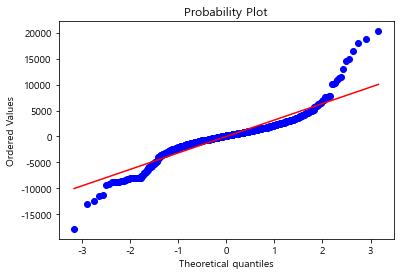

In [35]:
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()

**빨간 실선에서 많이 벗어남을 확인할 수 있다.**

### shapiro 테스트(p-value가 0.05보다 커야 정규성 만족)

In [36]:
from scipy import stats
import scipy.stats
stats.shapiro(resid)

ShapiroResult(statistic=0.8819159865379333, pvalue=1.906000482952475e-25)

**p값이 0에 가까우므로 잔차가 정규분포를 따르지 않음을 확인.**

### 잔차의 선형성

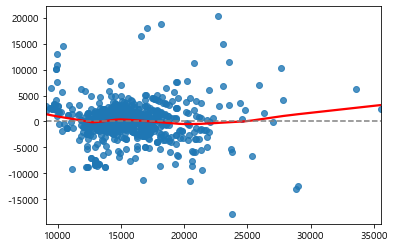

In [37]:
sns.regplot(fitted, resid, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

**빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것**

### 잔차의 등분산성

In [38]:
sr = scipy.stats.zscore(resid)

<AxesSubplot:>

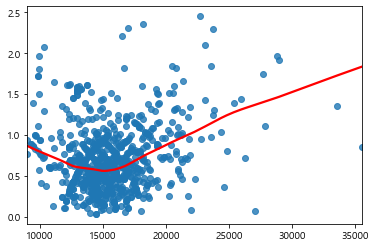

In [39]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

**빨간색 실선이 수평선을 그리는 것이 이상적. 따라서 잔차의 분산이 동일하지 않음을 확인.**

# 4. Two-way analysis

## 1. 분야별 베스트셀러의 평균 가격

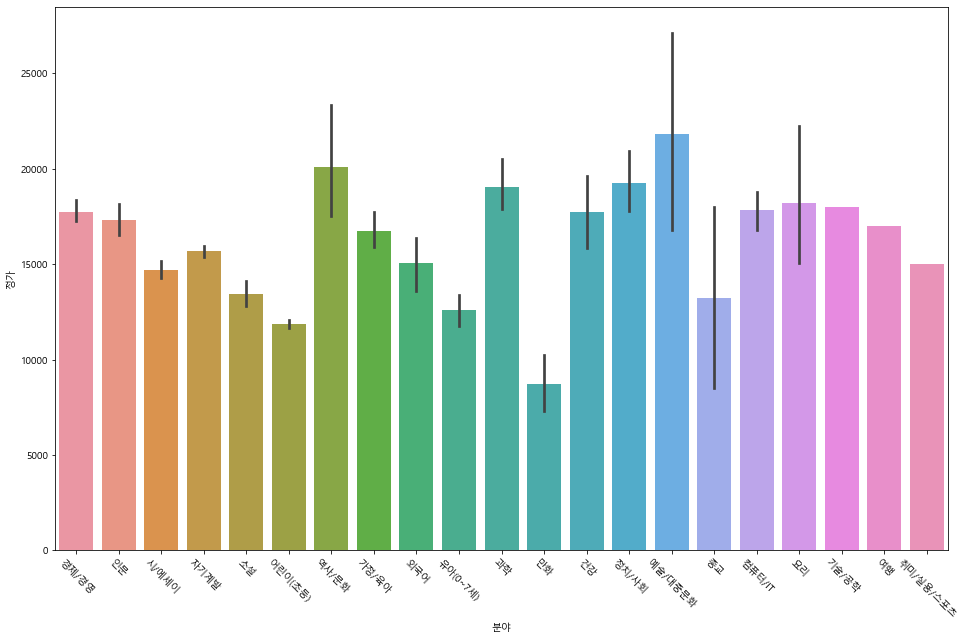

In [40]:
plt.figure(figsize = (16,10))
plt.xticks(rotation = - 45 )
sns.barplot(x='분야', y='정가', data=df1)
plt.show()

**평균 가격이 제일 높은 분야는 예술/대중문화 분야이고, 만화 분야가 평균 가격이 제일 낮다.**

In [41]:
g_price = df1.groupby('분야')['정가'].mean()
g_price

분야
가정/육아        16762.500000
건강           17737.500000
경제/경영        17757.051282
과학           19054.166667
기술/공학        18000.000000
만화            8719.512195
소설           13439.316239
시/에세이        14719.469027
어린이(초등)      11874.000000
여행           17000.000000
역사/문화        20104.761905
예술/대중문화      21808.333333
외국어          15048.148148
요리           18233.333333
유아(0~7세)     12592.857143
인문           17338.823529
자기계발         15686.813187
정치/사회        19278.378378
종교           13250.000000
취미/실용/스포츠    15000.000000
컴퓨터/IT       17866.666667
Name: 정가, dtype: float64

## 2. 분야별 베스트셀러의 평균 쪽수

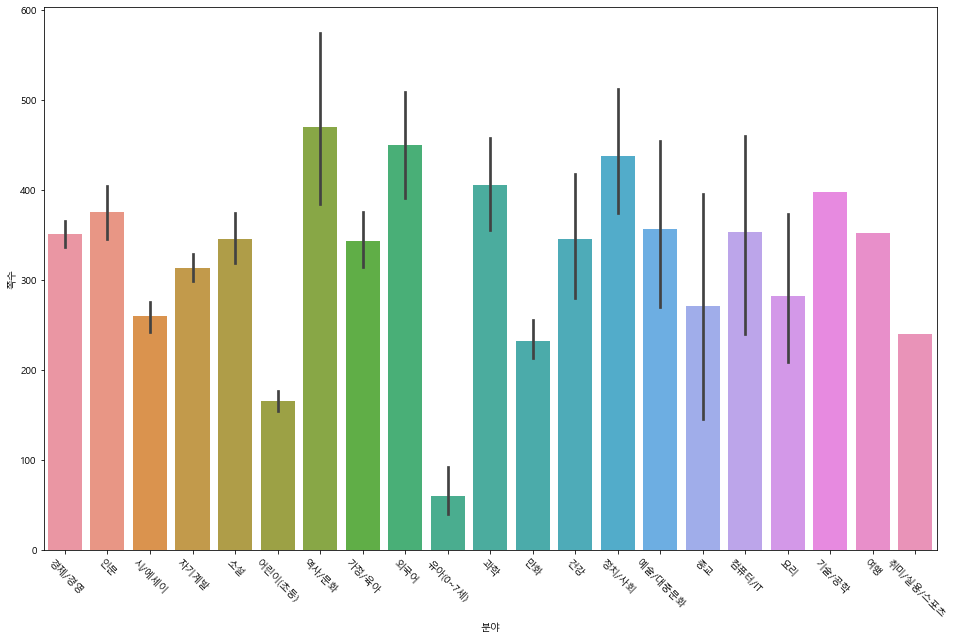

In [42]:
plt.figure(figsize = (16,10))
plt.xticks(rotation = - 45 )
sns.barplot(x='분야', y='쪽수', data=df1)
plt.show()

**역사/문화, 외국어, 정치/사회 분야의 베스트셀러가 평균 쪽수가 제일 많고, 어린이, 유아등 연령대가 낮은 분야의 베스트셀러가 평균 쪽수가 적다.**

In [43]:
g_page = df1.groupby('분야')['쪽수'].mean()
g_page

분야
가정/육아        344.000000
건강           346.062500
경제/경영        350.974359
과학           406.291667
기술/공학        398.000000
만화           232.585366
소설           346.222222
시/에세이        259.902655
어린이(초등)      165.540000
여행           352.000000
역사/문화        469.714286
예술/대중문화      357.000000
외국어          449.851852
요리           282.444444
유아(0~7세)      60.714286
인문           375.576471
자기계발         313.725275
정치/사회        437.702703
종교           271.000000
취미/실용/스포츠    240.000000
컴퓨터/IT       353.333333
Name: 쪽수, dtype: float64

## 3. 분야와 계절의 상관관계
### 과연 계절마다 선호하는 분야가 다를까?
### 12 1 2, 3 4 5, 6 7 8, 9 10 11 로 나누어서 분야별 개수를 판단.**

### 월별 데이터가 필요하므로, 중복을 허용한 데이터를 사용해야 한다.

In [44]:
bstSeller = df

### 1. 겨울

In [45]:
is_month_wnt = bstSeller[bstSeller['월'] == 12]
is_month_wnt = is_month_wnt.append(bstSeller[bstSeller['월'] == 1],ignore_index=True)
is_month_wnt = is_month_wnt.append(bstSeller[bstSeller['월'] == 2],ignore_index=True)
print(is_month_wnt['분야'].value_counts())

경제/경영       89
시/에세이       82
소설          79
인문          76
자기계발        60
어린이(초등)     56
외국어         42
역사/문화       21
과학          15
정치/사회       15
유아(0~7세)    13
만화          12
가정/육아       11
건강          11
예술/대중문화     10
컴퓨터/IT       3
종교           2
요리           2
기술/공학        1
Name: 분야, dtype: int64


<AxesSubplot:xlabel='분야', ylabel='count'>

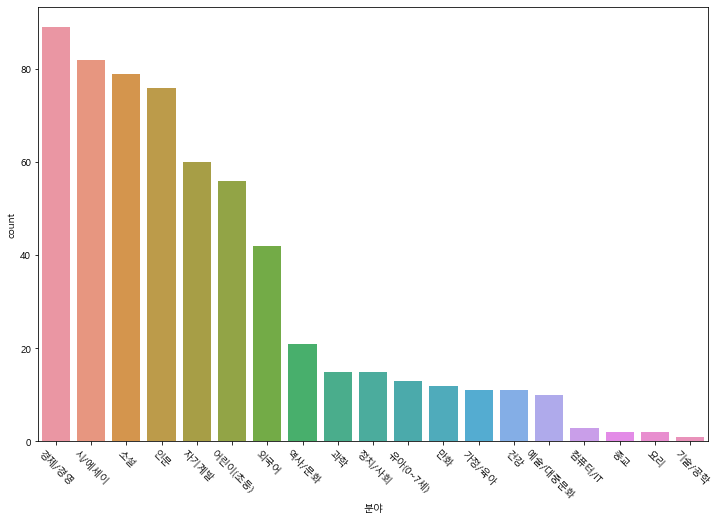

In [46]:
plt.figure(figsize = (12,8))
plt.xticks(rotation = - 45 )
sns.countplot(is_month_wnt['분야'], order = is_month_wnt['분야'].value_counts().index)

**겨울에는 외국어 분야의 책이 다른 계절에 비해 2배 정도 더 베스트셀러에 올랐다.**

### 2. 봄

In [47]:
is_month_spr = bstSeller[bstSeller['월'] == 3]
is_month_spr = is_month_spr.append(bstSeller[bstSeller['월'] == 4],ignore_index=True)
is_month_spr = is_month_spr.append(bstSeller[bstSeller['월'] == 5],ignore_index=True)
print(is_month_spr['분야'].value_counts())

소설          102
경제/경영        93
시/에세이        70
인문           68
자기계발         67
어린이(초등)      56
외국어          25
과학           22
정치/사회        20
역사/문화        14
만화           13
가정/육아        11
유아(0~7세)     10
예술/대중문화       9
건강            8
요리            6
컴퓨터/IT        2
종교            2
기술/공학         1
여행            1
Name: 분야, dtype: int64


<AxesSubplot:xlabel='분야', ylabel='count'>

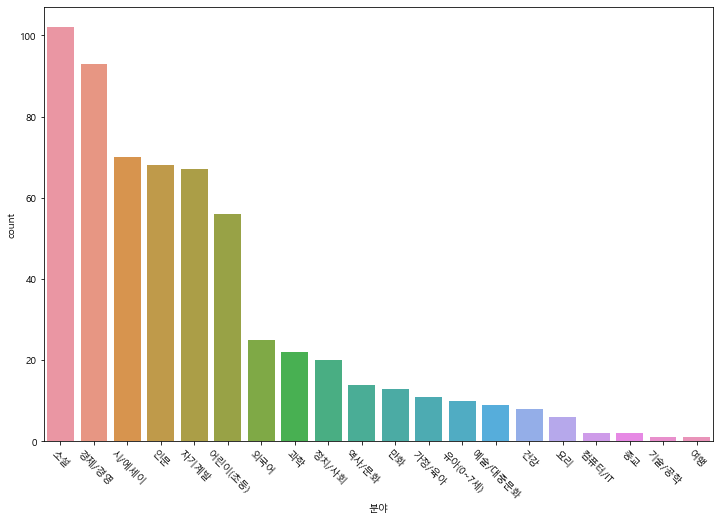

In [48]:
plt.figure(figsize = (12,8))
plt.xticks(rotation = - 45 )
sns.countplot(is_month_spr['분야'], order = is_month_spr['분야'].value_counts().index)

**봄에는 소설을 많이 읽는다.**

### 3. 여름

In [49]:
is_month_summ = bstSeller[bstSeller['월'] == 6]
is_month_summ = is_month_summ.append(bstSeller[bstSeller['월'] == 7],ignore_index=True)
is_month_summ = is_month_summ.append(bstSeller[bstSeller['월'] == 8],ignore_index=True)
print(is_month_summ['분야'].value_counts())

경제/경영       98
소설          90
시/에세이       85
인문          70
자기계발        60
어린이(초등)     56
외국어         28
정치/사회       23
역사/문화       17
만화          17
과학          14
건강          10
가정/육아        9
유아(0~7세)     9
요리           6
예술/대중문화      4
컴퓨터/IT       3
여행           1
Name: 분야, dtype: int64


<AxesSubplot:xlabel='분야', ylabel='count'>

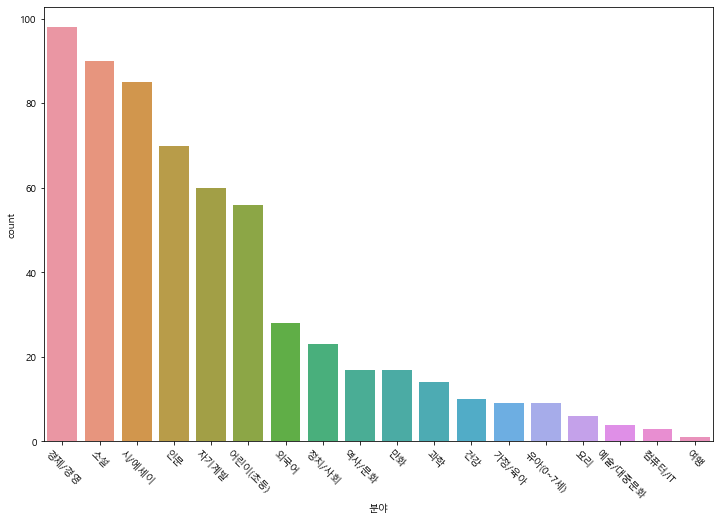

In [50]:
plt.figure(figsize = (12,8))
plt.xticks(rotation = - 45 )
sns.countplot(is_month_summ['분야'], order = is_month_summ['분야'].value_counts().index)

### 4. 가을

경제/경영        106
소설            85
시/에세이         84
인문            79
자기계발          64
어린이(초등)       60
외국어           20
정치/사회         19
만화            16
역사/문화         13
과학            13
가정/육아          9
유아(0~7세)       8
예술/대중문화        6
컴퓨터/IT         6
건강             5
요리             4
취미/실용/스포츠      1
기술/공학          1
종교             1
Name: 분야, dtype: int64


<AxesSubplot:xlabel='분야', ylabel='count'>

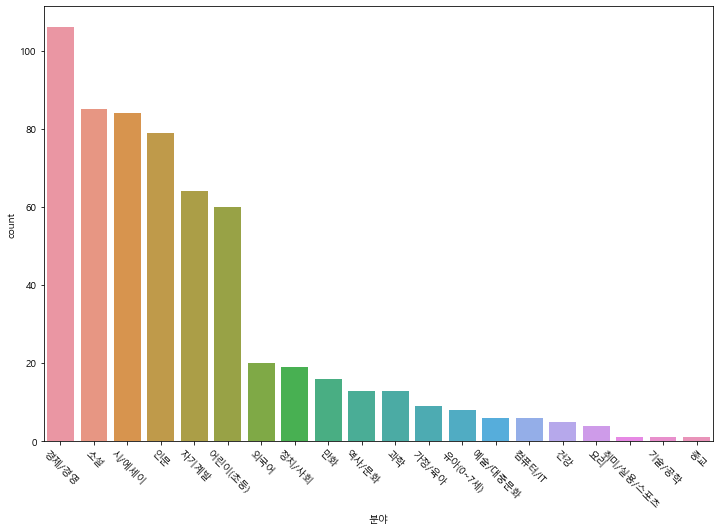

In [51]:
is_month_fall = bstSeller[bstSeller['월'] == 9]
is_month_fall = is_month_fall.append(bstSeller[bstSeller['월'] == 10],ignore_index=True)
is_month_fall = is_month_fall.append(bstSeller[bstSeller['월'] == 11],ignore_index=True)
print(is_month_fall['분야'].value_counts())
plt.figure(figsize = (12,8))
plt.xticks(rotation = - 45 )
sns.countplot(is_month_fall['분야'],order = is_month_fall['분야'].value_counts().index)

In [52]:
f = df1['분야'] == '외국어'
f = df1[f]
f

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
19,20,해커스 토익 기출 보카 TOEIC VOCA(개정판 5판),David Cho,해커스어학연구소,2020-03-05,외국어,12900,566,12
69,70,해커스 토익 RC 리딩(Reading)(개정판 8판),David Cho,해커스어학연구소,2020-03-02,외국어,18800,800,12
77,78,영어회화 핵심패턴 233,백선엽,길벗이지톡,2016-08-15,외국어,15000,404,12
89,90,해커스 토익 LC 리스닝(Listening)(개정판 8판),David Cho,해커스어학연구소,2020-03-18,외국어,18800,626,12
115,116,기적의 말하기 영단어 1000(무료 MP3 파일),이시원,시원스쿨닷컴,2019-02-12,외국어,9000,348,12
141,142,해커스 보카(Hackers Vocabulary)(개정판 2판),David Cho,해커스어학연구소,2015-07-01,외국어,16900,366,12
143,144,해커스 토익 700+ LC+RC(한 권으로 끝내는),해커스 어학연구소,해커스어학연구소,2020-04-17,외국어,19500,596,12
192,193,해커스 토익 스타트 리딩(Reading) RC(개정판 4판),David Cho,해커스어학연구소,2020-02-20,외국어,14900,580,12
210,70,해커스 토익 스타트 리스닝(Listening) LC(개정판 4판),David Cho,해커스어학연구소,2020-03-09,외국어,14900,572,1
228,130,해커스 토익 왕기초 RC Reading 리딩(2020),해커스 어학연구소,해커스어학연구소,2020-05-28,외국어,13900,340,1


**확실히 외국어 분야의 경우 겨울에 대부분 분포해있음을 확인 가능**

## 4. 출간일 관련 분석

In [53]:
df1['출간일'] = df1['출간일'].astype(str).str[:4]  # apply(str) 타입을 변환해주어야 함

In [54]:
df1['출간일'] = df1['출간일'].astype('category').str[:4]  # 맨 앞 4자리만 남김

In [55]:
df1

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
0,1,트렌드 코리아 2020,김난도,미래의창,2019,경제/경영,18000,448,12
1,2,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,2019,인문,16000,392,12
2,3,지쳤거나 좋아하는 게 없거나,글배우,강한별,2019,시/에세이,13500,248,12
3,4,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,2019,인문,19800,474,12
4,5,에이트(양장본 HardCover),이지성,차이정원,2019,자기계발,17000,308,12
...,...,...,...,...,...,...,...,...,...
884,184,권력은 사람의 뇌를 바꾼다,강준만,인물과사상사,2020,정치/사회,17000,360,11
885,189,시가 나에게 살라고 한다,나태주 (엮음),&(앤드),2020,시/에세이,14500,260,11
886,191,수상한 이웃집(잠뜰TV 오리지널 스토리북)(양장본 HardCover),잠뜰TV (원작),서울문화사,2020,어린이(초등),11000,1,11
887,198,주식 네 이놈. 2: 기법편,문제룡,지서연,2020,경제/경영,20000,292,11


### 1. 전체 출간일 분포

<AxesSubplot:xlabel='출간일'>

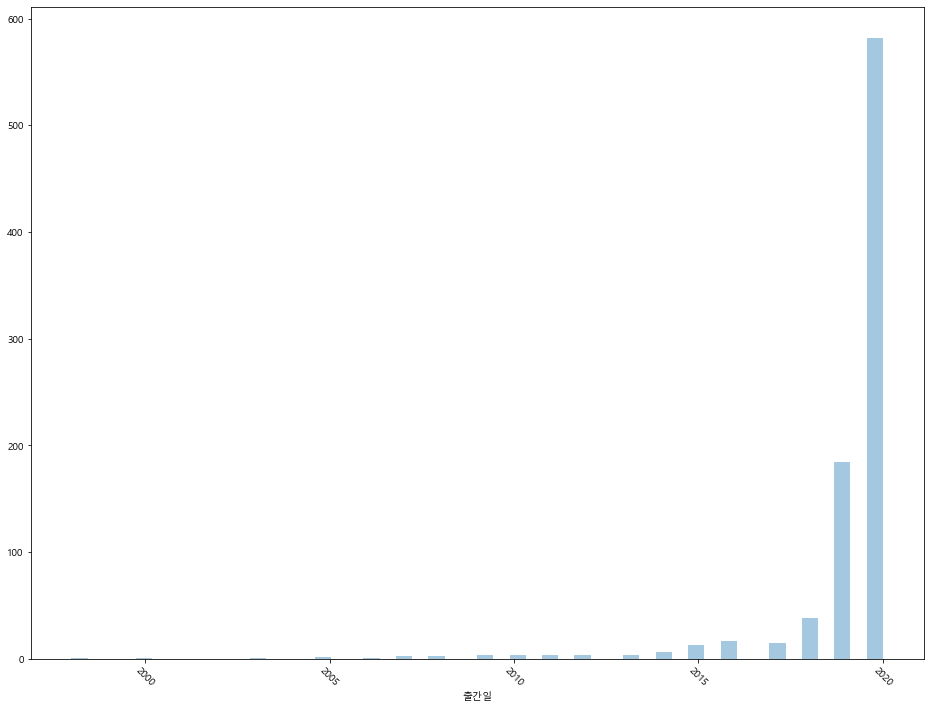

In [56]:
plt.figure(figsize = (16,12))
plt.xticks(rotation = - 45 )
sns.distplot(df1['출간일'], kde=False) 

In [57]:
count_y = df1['출간일'].value_counts()
count_y

2020    582
2019    185
2018     38
2016     17
2017     15
2015     13
2014      7
2013      4
2011      4
2012      4
2009      4
2010      4
2007      3
2008      3
2005      2
2000      1
2003      1
1998      1
2006      1
Name: 출간일, dtype: int64

**베스트셀러의 대부분이 2020년에 출판된 책이며, 오래된 책일 수록 베스트셀러 목록에 거의 오르지 못했다.**

In [58]:
i = df1['출간일'] == '1998'
i = df1[i]
i

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
461,185,호밀밭의 파수꾼(문예세계문학선 3),J. D. 샐린저,문예출판사,1998,소설,8000,326,4


In [59]:
i = df1['출간일'] == '2000'
i = df1[i]
i

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
382,164,난장이가 쏘아 올린 작은 공,조세희,이성과힘,2000,소설,11000,352,3


In [60]:
i = df1['출간일'] == '2003'
i = df1[i]
i

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
208,67,서양미술사,E. H. 곰브리치,예경,2003,예술/대중문화,38000,688,1


### 2. 분야별 출간일 분포

<AxesSubplot:xlabel='출간일', ylabel='count'>

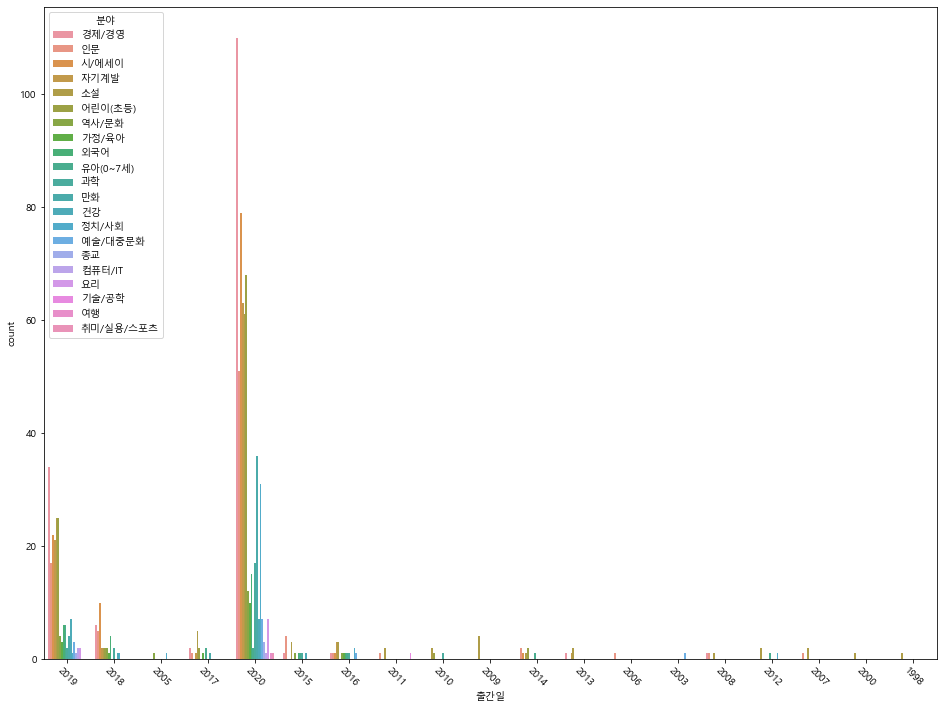

In [61]:
plt.figure(figsize = (16,12))
plt.xticks(rotation = - 45 )
sns.countplot(x='출간일', hue='분야', data=df1)

**경제/경영 분야는 돋보이게 최근에 출판된 책이 베스트셀러에 오르는 경향을 보이고 있다. 이는 아마 변화에 민감한 분야이기 때문일 것이라고 유추 가능하다.**

In [62]:
eco = df1['분야'] == '경제/경영'
eco = df1[eco]
eco

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
0,1,트렌드 코리아 2020,김난도,미래의창,2019,경제/경영,18000,448,12
10,11,90년생이 온다,임홍택,웨일북(whalebooks),2018,경제/경영,14000,336,12
15,16,대한민국 부동산 사용설명서(양장본 HardCover),김학렬,에프엔미디어,2020,경제/경영,19500,344,12
16,17,부의 인문학,브라운스톤,오픈마인드,2019,경제/경영,15000,294,12
17,18,넛지(양장본 HardCover),리처드 탈러,리더스북,2018,경제/경영,18000,428,12
...,...,...,...,...,...,...,...,...,...
857,98,7대 이슈로 보는 돈의 역사. 2,홍춘욱,로크미디어,2020,경제/경영,17800,364,11
867,129,1타 7피 주식 초보 최고 계략,박성현,에프엔미디어,2020,경제/경영,16000,264,11
877,170,언카피어블,짐 매켈비,리더스북,2020,경제/경영,16000,314,11
880,175,"위기의 시대, 돈의 미래(양장본 HardCover)",짐 로저스,리더스북,2020,경제/경영,17500,264,11


<AxesSubplot:xlabel='출간일', ylabel='count'>

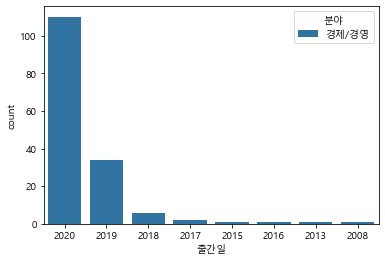

In [63]:
sns.countplot(x='출간일', hue='분야', data=eco, order = eco['출간일'].value_counts().index)

In [64]:
nov = df1['분야'] == '소설'
nov = df1[nov]
nov

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
5,6,작가들의 비밀스러운 삶,기욤 뮈소,밝은세상,2019,소설,14800,340,12
12,13,데미안(리커버 한정판)(초판본)(1919년 오리지널 초판본 패브릭 에디션)(양장본 ...,헤르만 헤세,더스토리,2017,소설,12000,248,12
22,23,일의 기쁨과 슬픔,장류진,창비,2019,소설,14000,236,12
28,29,82년생 김지영(오늘의 젊은 작가 13)(양장본 HardCover),조남주,민음사,2016,소설,13000,192,12
29,30,아홉 명의 완벽한 타인들,리안 모리아티,마시멜로,2019,소설,15800,600,12
...,...,...,...,...,...,...,...,...,...
828,11,일인칭 단수(양장본 HardCover),무라카미 하루키,문학동네,2020,소설,14500,236,11
830,16,추리소설가의 살인사건(양장본 HardCover),히가시노 게이고,소미미디어,2020,소설,15800,288,11
831,20,바이러스 X,김진명,이타북스,2020,소설,15800,324,11
837,42,인생은 소설이다,기욤 뮈소,밝은세상,2020,소설,15000,312,11


<AxesSubplot:xlabel='출간일', ylabel='count'>

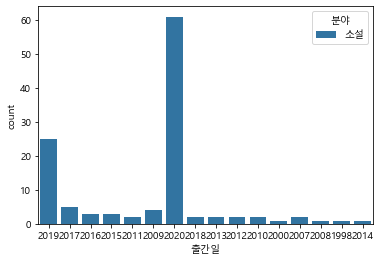

In [65]:
sns.countplot(x='출간일', hue='분야', data=nov) # order = nov['출간일'].value_counts().index

**소설 분야는 비교적 베스트셀러의 분포가 다양하다.**